## UN Project

3.     Import the required packages with their customary aliases as follows:

In [ ]:
 ## Read gdp data as csv

In [190]:
    import pandas as pd   
    import numpy as np  
    import matplotlib.pyplot as plt  
    import seaborn as sns

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [191]:
gdp_df =pd.read_csv('../data/gdp_percapita.csv.csv')

In [192]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


In [193]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN
7175,Zimbabwe,1990,2652.129209,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [194]:
gdp_df.shape

(7176, 4)

In [195]:
## data type for each column


In [196]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [197]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [198]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [199]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [200]:
## rename

In [201]:
gdp_df = gdp_df.rename(columns = {'Country or Area' : 'Country','Year' : 'Year','Value' : 'GDP_Per_Capita'})

In [202]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [203]:
# to see any possible null countries and how many countries have data all years

In [204]:
gdp_df.Country.value_counts(dropna = False)

Country
Least developed countries: UN classification    31
Niger                                           31
Middle East & North Africa (IDA & IBRD)         31
Middle income                                   31
Mongolia                                        31
                                                ..
Kosovo                                          13
Turks and Caicos Islands                        10
Sint Maarten (Dutch part)                       10
Somalia                                          8
Djibouti                                         8
Name: count, Length: 242, dtype: int64

In [205]:
# or I can use gdp_df.Country.value_counts()

In [206]:
# no null value

In [207]:
Country_numbers = gdp_df.Country.value_counts()

In [208]:
Country_numbers = Country_numbers.to_frame()

In [209]:
type(Country_numbers)

pandas.core.frame.DataFrame

In [210]:
Country_numbers

,count
Country,
Least developed countries: UN classification,31
Niger,31
Middle East & North Africa (IDA & IBRD),31
Middle income,31
Mongolia,31
...,...
Kosovo,13
Turks and Caicos Islands,10
Sint Maarten (Dutch part),10


In [211]:
Country_numbers.reset_index()

,Country,count
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
237,Kosovo,13
238,Turks and Caicos Islands,10
239,Sint Maarten (Dutch part),10
240,Somalia,8


In [212]:
Country_numbers.query('count == 31')
#country_numbers of max count = the number of years

,count
Country,
Least developed countries: UN classification,31
Niger,31
Middle East & North Africa (IDA & IBRD),31
Middle income,31
Mongolia,31
...,...
IDA only,31
Fragile and conflict affected situations,31
Ireland,31


     => 205 countries have data all years.

In [213]:
 Country_numbers.query('count != 31').head()

,count
Country,
Turkmenistan,30
Hungary,30
Slovak Republic,29
Cambodia,28
West Bank and Gaza,27


In [214]:
missing_data = Country_numbers.query('count != 31')

In [215]:
missing_data.shape

(37, 1)

     => 37 countries missing data.

In [216]:
#Look at the number of observations per year

In [217]:
gdp_df.Year.value_counts().head()

Year
2018    242
2017    242
2016    242
2015    242
2014    242
Name: count, dtype: int64

In [218]:
year_observation = gdp_df.Year.value_counts()

In [219]:
year_observation = year_observation.to_frame()

In [220]:
type(year_observation)

pandas.core.frame.DataFrame

In [221]:
year_observation.reset_index().head()

,Year,count
0,2018,242
1,2017,242
2,2016,242
3,2015,242
4,2014,242


In [222]:
year_observation.rename(columns = {'count':'observation'}).head()

,observation
Year,
2018,242
2017,242
2016,242
2015,242
2014,242


In [223]:
year_observation.shape

(31, 1)

     => as the year in progress the number of countries having data increased until 2018 then slightly decreased until 2020.

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [224]:
    import matplotlib.pyplot as plt  
    import seaborn as sns

In [225]:
gdp_df.loc[gdp_df['Year'] == 2020]

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


In [226]:
year2020 = gdp_df.loc[gdp_df['Year'] == 2020]

In [227]:
year2020['GDP_Per_Capita']

0        1970.560169
19       3491.978104
50       4021.293919
81      13253.733337
112     10735.382539
            ...     
7025    10338.270543
7056     5402.538773
7083    16269.969854
7114     3277.816510
7145     2134.555461
Name: GDP_Per_Capita, Length: 240, dtype: float64

In [228]:
data2020 = year2020['GDP_Per_Capita']
data2020

0        1970.560169
19       3491.978104
50       4021.293919
81      13253.733337
112     10735.382539
            ...     
7025    10338.270543
7056     5402.538773
7083    16269.969854
7114     3277.816510
7145     2134.555461
Name: GDP_Per_Capita, Length: 240, dtype: float64

## Histogram Plot

<Axes: xlabel='GDP_Per_Capita', ylabel='Count'>

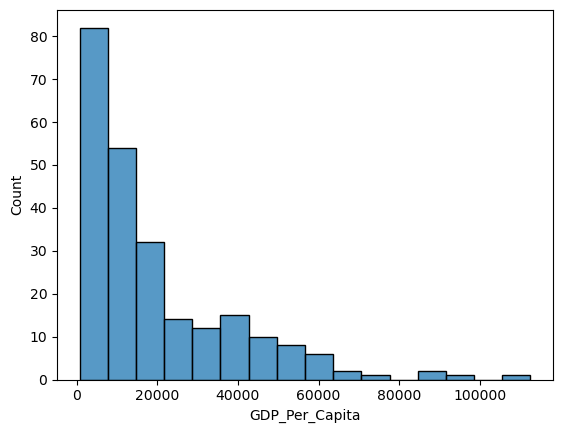

In [229]:
sns.histplot(data2020)

## Density plot

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

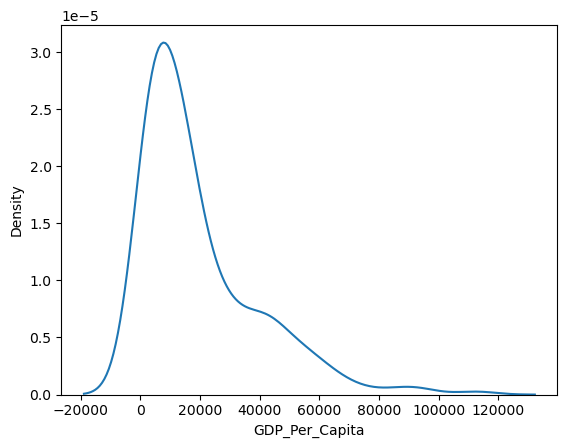

In [230]:
sns.kdeplot(data2020)

## Boxplot

<Axes: >

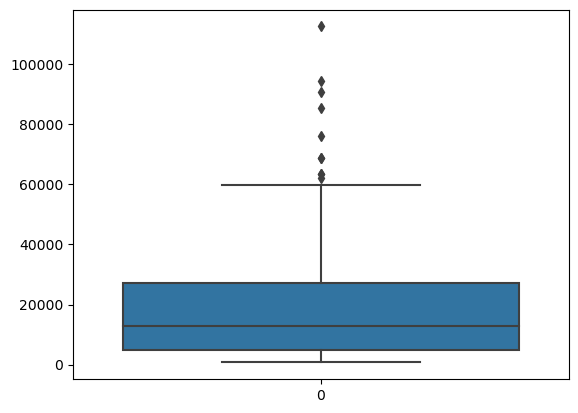

In [231]:
sns.boxplot(data2020)

## violin plot

<Axes: >

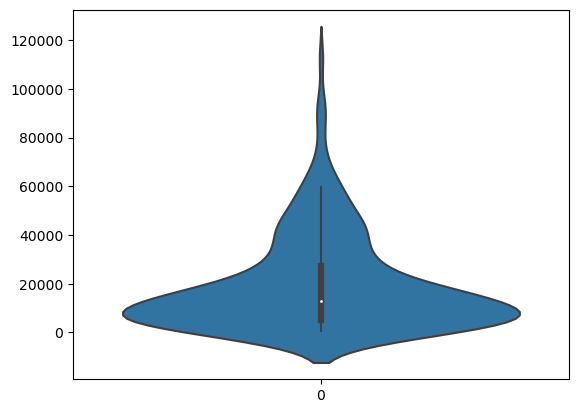

In [232]:
sns.violinplot(data2020)

      =>  when GDB-Per-Capita distribution is high, data distribution getting less and the vice-versa.

9. What was the median GDP per capita value in 2020?

In [233]:
data2020

0        1970.560169
19       3491.978104
50       4021.293919
81      13253.733337
112     10735.382539
            ...     
7025    10338.270543
7056     5402.538773
7083    16269.969854
7114     3277.816510
7145     2134.555461
Name: GDP_Per_Capita, Length: 240, dtype: float64

In [234]:
sorteddata = data2020.sort_values().to_frame

In [235]:
sorteddata

<bound method Series.to_frame of 914        731.064074
1136       937.856470
1524      1082.445242
5871      1180.965971
4750      1221.269930
            ...      
639      76105.138057
5381     85290.450430
3071     90789.221024
5720     94505.636160
3882    112557.309472
Name: GDP_Per_Capita, Length: 240, dtype: float64>

In [236]:
round(data2020.median(),2)

12908.94

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-

In [237]:
gdp_df['Year']

0       2020
1       2019
2       2018
3       2017
4       2016
        ... 
7171    1994
7172    1993
7173    1992
7174    1991
7175    1990
Name: Year, Length: 7176, dtype: int64

In [238]:
decade_Years = [1990,2000,2010,2020]

In [239]:
gdp_decades = gdp_df.query('Year in @ decade_Years')

In [240]:
gdp_decades

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
10,Afghanistan,2010,1957.029070
19,Africa Eastern and Southern,2020,3491.978104
29,Africa Eastern and Southern,2010,3545.205203
39,Africa Eastern and Southern,2000,2915.472987
...,...,...,...
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461
7155,Zimbabwe,2010,1813.531764
7165,Zimbabwe,2000,2771.060576


Boxplot

In [241]:
# sns.boxplot( x=df["species"], y=df["sepal_length"] )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

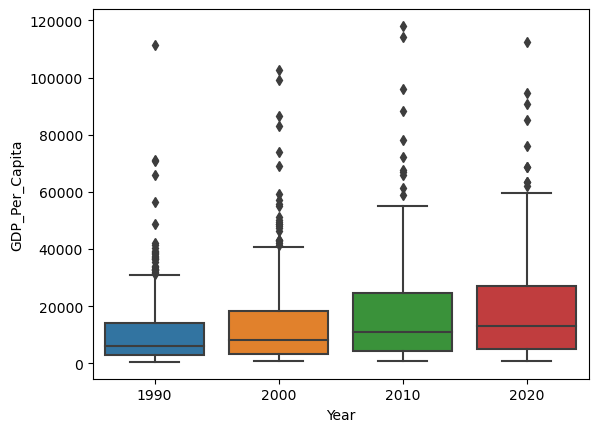

In [242]:
sns.boxplot(x = gdp_decades['Year'] ,
            y = gdp_decades['GDP_Per_Capita'])

Barplot

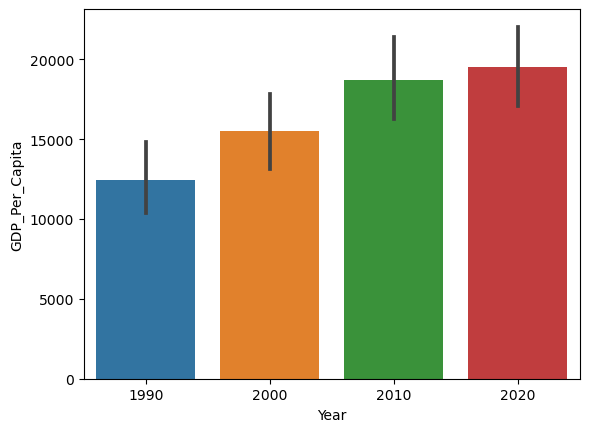

In [243]:
sns.barplot(
    y='GDP_Per_Capita', 
    x='Year', 
    data=gdp_decades); 

scatterplot 

In [244]:
# plt.scatter(x , y, data  )
# plt.xlabel()
# plt.ylabel();

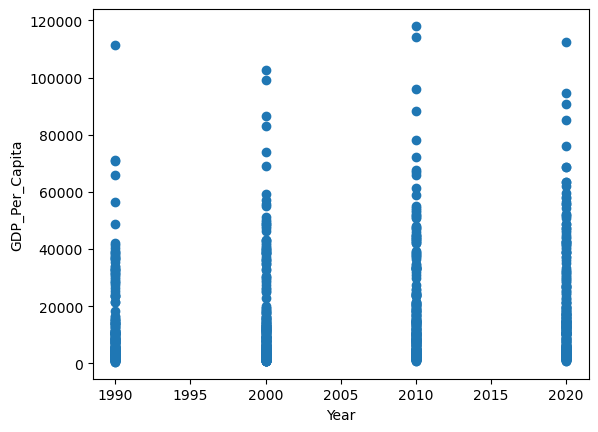

In [245]:
plt.scatter(x = 'Year', y ='GDP_Per_Capita', data = gdp_decades)
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita');

scatterplot with a trend line overlaid

In [246]:
# sns.regplot(x=df["sepal_length"], y=df["sepal_width"], line_kws={"color":"r","alpha":0.7,"lw":5})
# plt.show()

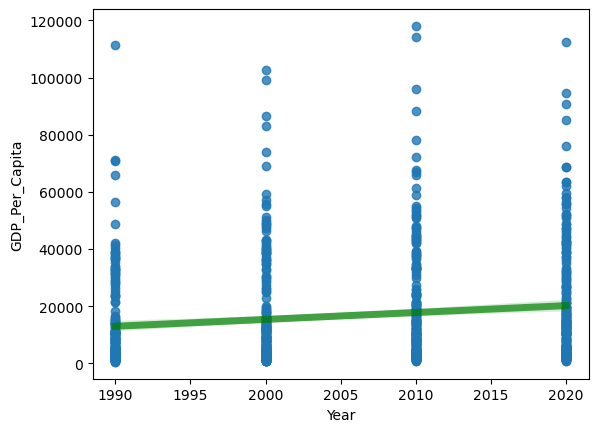

In [247]:
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'],line_kws={"color":"g","alpha":0.7,"lw":5})
plt.show()

** Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


11. Which country was the first to have a GDP per capita greater than $100,000?

In [248]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [249]:
GDP_Per_Capita_above100k = gdp_df.query('GDP_Per_Capita > 100000')
GDP_Per_Capita_above100k.tail()

,Country,Year,GDP_Per_Capita
6833,United Arab Emirates,1995,101570.992100
6834,United Arab Emirates,1994,100213.156226
6836,United Arab Emirates,1992,103470.924576
6837,United Arab Emirates,1991,106103.552655
6838,United Arab Emirates,1990,111454.055665


     => United Arab Emirates was the first to have GDP Per Capita greater than 100000., which is 111,454.055665 in 1990.

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [250]:
year2020 = gdp_df.query('Year == 2020')
year2020.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539


In [251]:
# Or  I can use .loc
year2020 = gdp_df.loc[gdp_df['Year'] == 2020]
year2020.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539


In [252]:
year2020.sort_values(by ='GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472
5720,Singapore,2020,94505.636160
3071,Ireland,2020,90789.221024
5381,Qatar,2020,85290.450430
639,Bermuda,2020,76105.138057
...,...,...,...
4750,Niger,2020,1221.269930
5871,Somalia,2020,1180.965971
1524,Dem. Rep. Congo,2020,1082.445242
1136,Central African Republic,2020,937.856470


     =>  Luxembourg had the highest GDP per Capita in 2020.

 ** Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [253]:
Luxembourg_throughyears = gdp_df.loc[gdp_df['Country'] == 'Luxembourg']
Luxembourg_throughyears.head()

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472
3883,Luxembourg,2019,116518.276815
3884,Luxembourg,2018,115049.926079
3885,Luxembourg,2017,114985.842236
3886,Luxembourg,2016,116283.699681


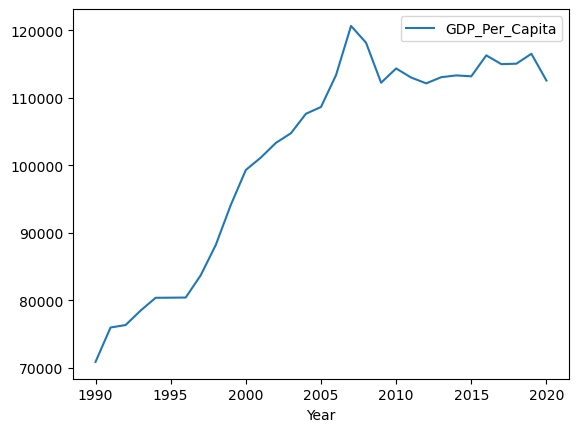

In [254]:
# I use df.plot('x', 'y') 
#        plt.show()
Luxembourg_throughyears.plot('Year', 'GDP_Per_Capita')
plt.show()

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [255]:
data2020 =gdp_df.loc[gdp_df['Year'] == 2020].sort_values(by = 'GDP_Per_Capita', ascending =  True)
data2020.head()

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074
1136,Central African Republic,2020,937.856470
1524,Dem. Rep. Congo,2020,1082.445242
5871,Somalia,2020,1180.965971
4750,Niger,2020,1221.269930


        => Burundi had the lowest GDP per capita in 2020.

** Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [256]:
Burundi_throughyears = gdp_df.loc[gdp_df['Country']== 'Burundi']
Burundi_throughyears.head()

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074
915,Burundi,2019,751.443405
916,Burundi,2018,761.524143
917,Burundi,2017,773.572859
918,Burundi,2016,794.604340


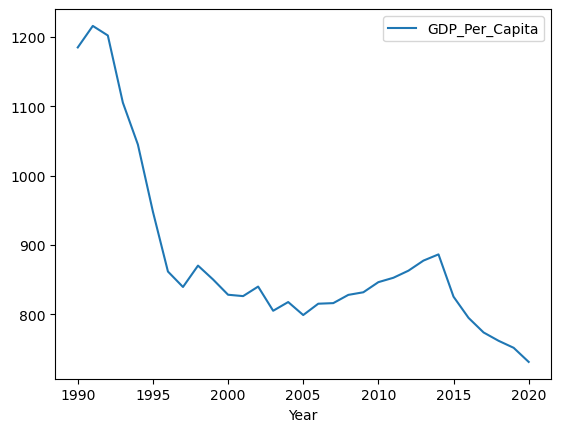

In [257]:
# I use df.plot('x', 'y') 
#        plt.show()
Burundi_throughyears.plot('Year', 'GDP_Per_Capita')
plt.show()

*** Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [258]:
data2020 = gdp_df.loc[gdp_df['Year'] == 2020].sort_values(by = 'Country')

In [259]:
data2020

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


In [260]:
data1990 = gdp_df.loc[gdp_df['Year'] == 1990].sort_values(by = 'Country')

In [261]:
data1990

,Country,Year,GDP_Per_Capita
49,Africa Eastern and Southern,1990,3083.976800
80,Africa Western and Central,1990,2810.341129
111,Albania,1990,4827.034551
142,Algeria,1990,8746.340762
173,Angola,1990,5758.950488
...,...,...,...
7024,Vanuatu,1990,2855.554643
7055,Vietnam,1990,2066.372215
7113,World,1990,9704.621768
7144,Zambia,1990,2190.181724


In [262]:
#  'compare'  uses to compare identically-labeled DataFrames

In [77]:
bothdatas = pd.concat([data2020 , data1990]).sort_values(by = 'Country')
bothdatas

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
49,Africa Eastern and Southern,1990,3083.976800
50,Africa Western and Central,2020,4021.293919
80,Africa Western and Central,1990,2810.341129
...,...,...,...
7113,World,1990,9704.621768
7114,Zambia,2020,3277.816510
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461


Text(0, 0.5, 'GDP_Per_Capita')

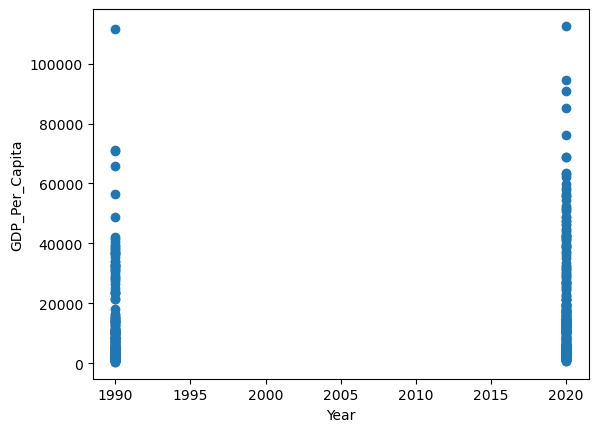

In [78]:
plt.scatter(x = 'Year', y ='GDP_Per_Capita', data = bothdatas)
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')

         =>  when I compare each GDP_Per_Capita by countries, 2020 had higher GDP_per_Capita

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [130]:
internet_df = pd.read_csv('../data/internet_use.csv.csv', nrows = 4495 )

In [131]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [132]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [133]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [134]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])
internet_df.head()

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [135]:
# rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'
internet_df =internet_df.rename(columns = {'Country or Area': 'Country', 'Year': 'Year','Value': 'Internet_Users_Pct'})
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


16. Look at the number of observations in this dataset per year. What do you notice?

In [178]:
year_observation = internet_df.value_counts('Year')
year_observation.head()

Year
1990    210
2011    207
2007    206
2008    204
2012    203
Name: count, dtype: int64

In [179]:
observation = year_observation.to_frame().reset_index()
observation.head()

,Year,count
0,1990,210
1,2011,207
2,2007,206
3,2008,204
4,2012,203


17. What is the first year to have a non-zero internet users percentage value?

In [138]:
internet_df.loc[internet_df['Internet_Users_Pct'] > 0].sort_values(by = 'Year').head(1)

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545


18. How does the distribution of internet users percent differ for 2000 and 2014?

In [139]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [140]:
internet_df.dtypes

Country                object
Year                    int64
Internet_Users_Pct    float64
dtype: object

In [147]:
list = ['2000', '2014']

In [148]:
internet_df.query( 'Year in @list')


,Country,Year,Internet_Users_Pct


In [149]:
# or by .isin

In [150]:
name = internet_df.loc[internet_df['Year'].isin([2000,2014])]
name

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
15,Albania,2014,60.100000
29,Albania,2000,0.114097
36,Algeria,2014,18.090000
50,Algeria,2000,0.491706
...,...,...,...
4445,Yemen,2000,0.082500
4451,Zambia,2014,17.340000
4465,Zambia,2000,0.191072
4473,Zimbabwe,2014,19.890000


In [151]:
# to see the distriubution , i use violin

<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

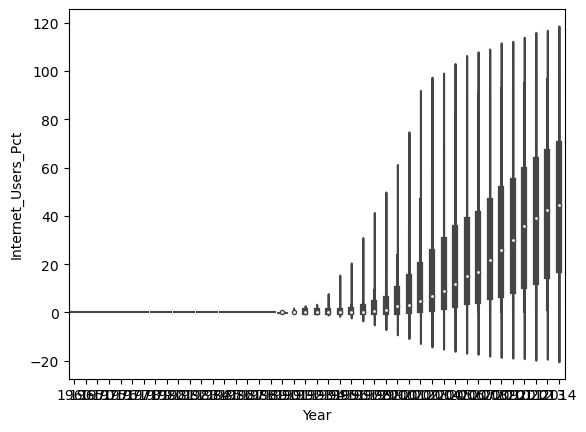

In [154]:
sns.violinplot(x=internet_df["Year"], y=internet_df["Internet_Users_Pct"])

  =>The distribution of internet users percent differ seems increase through the year.

19. For how many countries was the percentage of internet users below 5% in 2014?

In [161]:
internet2014 = internet_df.loc[internet_df['Year'] == 2014]
internet2014

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.39
15,Albania,2014,60.10
36,Algeria,2014,18.09
59,Andorra,2014,95.90
78,Angola,2014,21.26
...,...,...,...
4389,Viet Nam,2014,48.31
4409,Virgin Islands (U.S.),2014,50.07
4431,Yemen,2014,22.55
4451,Zambia,2014,17.34


In [175]:
below5 = internet2014.loc[internet2014['Internet_Users_Pct']  < 5]
below5

,Country,Year,Internet_Users_Pct
623,Burundi,2014,1.38
762,Central African Rep.,2014,4.03
782,Chad,2014,2.50
909,Congo (Democratic Republic of the),2014,3.00
1065,Dem. People's Rep. of Korea,2014,0.00
1256,Eritrea,2014,0.99
1299,Ethiopia,2014,2.90
1720,Guinea,2014,1.72
1742,Guinea-Bissau,2014,3.32
2453,Madagascar,2014,3.70


In [176]:
below5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 623 to 4019
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16 non-null     object 
 1   Year                16 non-null     int64  
 2   Internet_Users_Pct  16 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 512.0+ bytes


  => 16 countries below 5% internet user

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [186]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, left_on = ['Country','Year'], right_on =['Country','Year'], how = 'inner')
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2102.384604,6.390000
1,Afghanistan,2013,2116.465258,5.900000
2,Afghanistan,2012,2075.491614,5.454545
3,Afghanistan,2011,1904.559926,5.000000
4,Afghanistan,2010,1957.029070,4.000000
...,...,...,...,...
3410,Zimbabwe,1997,2856.118188,0.033080
3411,Zimbabwe,1996,2808.558556,0.016790
3412,Zimbabwe,1995,2573.993785,0.007684
3413,Zimbabwe,1994,2603.927369,0.001739


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [188]:
gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2014].sort_values(by = 'Internet_Users_Pct',ascending = False).head(3)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1372,Iceland,2014,50450.741612,98.16
372,Bermuda,2014,77361.104881,96.80
2277,Norway,2014,62390.130313,96.30
